Etapa 1: Preparar o Ambiente

Passo 1.1 – Importar bibliotecas

Rode o código abaixo para importar as ferramentas que usaremos

In [78]:
# Manipulação de dados
import pandas as pd
# Dividir os dados
from sklearn.model_selection import train_test_split
# SVM (máquina de vetor de suporte)
from sklearn.svm import SVC
# Padronização dos dados
from sklearn.preprocessing import StandardScaler
# Avaliação do modelo
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

Etapa 2: Obter e carregar o dataset

Passo 2.1 – Baixar o dataset
Você pode baixar o dataset diretamente do Kaggle: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

Depois, envie o arquivo data.csv para o Google Colab usando a caixinha de upload (ícone
de pasta no lado esquerdo).
Agora, carregue os dados com o código:

In [91]:
import kagglehub


path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

df = pd.read_csv(path + '/data.csv')

#output_path = '/content/breast_cancer_data.csv'
output_path = '/content/data.csv'

df.to_csv(output_path, index=False)

print(f"Arquivo CSV salvo em: {output_path}")

df = pd.read_csv('data.csv')
df.head()


Path to dataset files: /root/.cache/kagglehub/datasets/uciml/breast-cancer-wisconsin-data/versions/2
Arquivo CSV salvo em: /content/data.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Etapa 3: Entender e limpar os dados


In [80]:
#Passo 3.1 – Verificar estrutura dos dados
print(df.columns)

#Passo 3.2 – Remover colunas desnecessárias
df = df.drop(['id', 'Unnamed: 32'], axis=1)

print(df.columns)


#Passo 3.3 – Transformar a variável de saída em número
# M = 1 (maligno), B = 0 (benigno)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se

Etapa 4: Separar variáveis de entrada e saída

In [81]:
# Entrada (X): todas as colunas menos 'diagnosis
x = df.drop('diagnosis', axis=1)

#Saída (y): diagnóstico (0 ou 1)
y = df['diagnosis']


Etapa 5: Normalizar os dados


In [82]:
x = StandardScaler().fit_transform(x)

Etapa 6: Separar dados em treino e teste

In [83]:
x_dados_treino, x_teste, y_dados_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

Etapa 7: Treinar o modelo SVM

Vamos usar o kernel linear (mais simples para começar)

In [84]:
# Criando o modelo SVM

modelo = SVC(kernel='linear')
modeloc = SVC(kernel='linear', C=0.2)


# Treinando com os dados

modelo.fit(x_dados_treino, y_dados_treino)
modeloc.fit(x_dados_treino, y_dados_treino)

SVC(C=0.2, kernel='linear')

 Etapa 8: Testar o modelo


In [85]:
# Fazendo previsões
previsoes = modelo.predict(x_teste)
previsoesc = modeloc.predict(x_teste)


# Matriz de confusão e relatório
print("matriz de confusão")
print(confusion_matrix(y_teste, previsoes))
print("\nRelatório de Classificação:")
print(classification_report(y_teste, previsoes))


matriz de confusão
[[68  3]
 [ 2 41]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



Desafios

In [86]:
df2 = df.copy()
x2 = df2.drop('diagnosis', axis=1)
y2 = df2['diagnosis']

x = StandardScaler().fit_transform(x)
x2_dados_treino, x2_teste, y2_dados_treino, y2_teste = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [87]:
# Criando o modelo SVM
modelo2 = SVC(kernel='sigmoid')
modelo3 = SVC(kernel='rbf')
# Treinando com os dados
modelo2.fit(x2_dados_treino, y2_dados_treino)
modelo3.fit(x2_dados_treino, y2_dados_treino)

SVC()

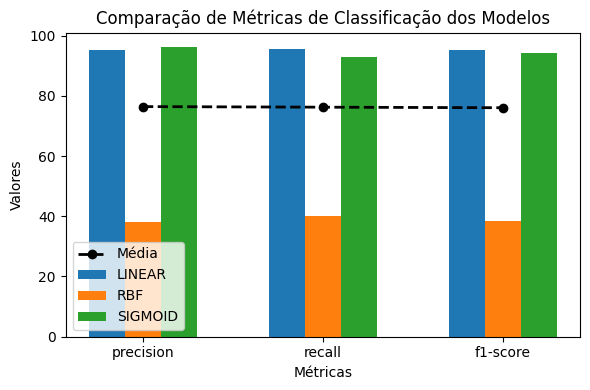

         precision     recall   f1-score
LINEAR   95.162338  95.561743  95.353387
RBF      37.976190  40.075336  38.541759
SIGMOID  96.103896  93.023256  94.222973

entre os que o modelo disse que são malignos, quantos realmente são?
LINEAR: Para o modelo LINEAR, aproximadamente 95,16% dos casos previstos como malignos eram realmente malignos.
RBF: Para o modelo RBF, aproximadamente 38% dos casos previstos como malignos eram realmente malignos.
SIGMOIDE: Para o modelo SIGMOIDE, aproximadamente 96,10% dos casos previstos como malignos eram realmente malignos.

entre os casos realmente malignos, quantos o modelo detectou?
LINEAR: Para o modelo LINEAR, aproximadamente 95% dos casos previstos como malignos eram realmente malignos.
RBF: Para o modelo RBF, aproximadamente 40% dos casos previstos como malignos eram realmente malignos.
SIGMOIDE: Para o modelo SIGMOIDE, aproximadamente 93% dos casos previstos como malignos eram realmente malignos.

média ponderada de precisão e recall.
LINEAR  

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

previsoes1 = previsoes
previsoes2 = modelo2.predict(x2_teste)
previsoes3 = modelo3.predict(x2_teste)

report1 = classification_report(y2_teste, previsoes1, output_dict=True)
report2 = classification_report(y2_teste, previsoes2, output_dict=True)
report3 = classification_report(y2_teste, previsoes3, output_dict=True)

metrics = ['precision', 'recall', 'f1-score']
model_names = ['LINEAR', 'RBF', 'SIGMOID']

values = []

for model_report in [report1, report2, report3]:
    model_metrics = []

    for metric in metrics:
        metric_value = model_report['macro avg'][metric] * 100

        model_metrics.append(metric_value)

    values.append(model_metrics)

values = np.array(values)
mean_values = values.mean(axis=0)

fig, ax = plt.subplots(figsize=(6, 4))
width = 0.2
x = np.arange(len(metrics))

ax.bar(x - width, values[0], width, label='LINEAR')
ax.bar(x, values[1], width, label='RBF')
ax.bar(x + width, values[2], width, label='SIGMOID')

ax.plot(x, mean_values, color='black', marker='o', label='Média', linestyle='--', linewidth=2)

ax.set_xlabel('Métricas')
ax.set_ylabel('Valores')
ax.set_title('Comparação de Métricas de Classificação dos Modelos')

ax.set_xticks(x)
ax.set_xticklabels(metrics)

ax.legend()

plt.tight_layout()
plt.show()

df_comparacao = pd.DataFrame(values, columns=metrics, index=model_names)

# Exibindo a tabela comparativa
print(df_comparacao)
print ("""\nentre os que o modelo disse que são malignos, quantos realmente são?
LINEAR: Para o modelo LINEAR, aproximadamente 95,16% dos casos previstos como malignos eram realmente malignos.
RBF: Para o modelo RBF, aproximadamente 38% dos casos previstos como malignos eram realmente malignos.
SIGMOIDE: Para o modelo SIGMOIDE, aproximadamente 96,10% dos casos previstos como malignos eram realmente malignos.

entre os casos realmente malignos, quantos o modelo detectou?
LINEAR: Para o modelo LINEAR, aproximadamente 95% dos casos previstos como malignos eram realmente malignos.
RBF: Para o modelo RBF, aproximadamente 40% dos casos previstos como malignos eram realmente malignos.
SIGMOIDE: Para o modelo SIGMOIDE, aproximadamente 93% dos casos previstos como malignos eram realmente malignos.

média ponderada de precisão e recall.
LINEAR   = 95,353387
RBF      = 38.541759
SIGMÓIDE = 94.222973
""")


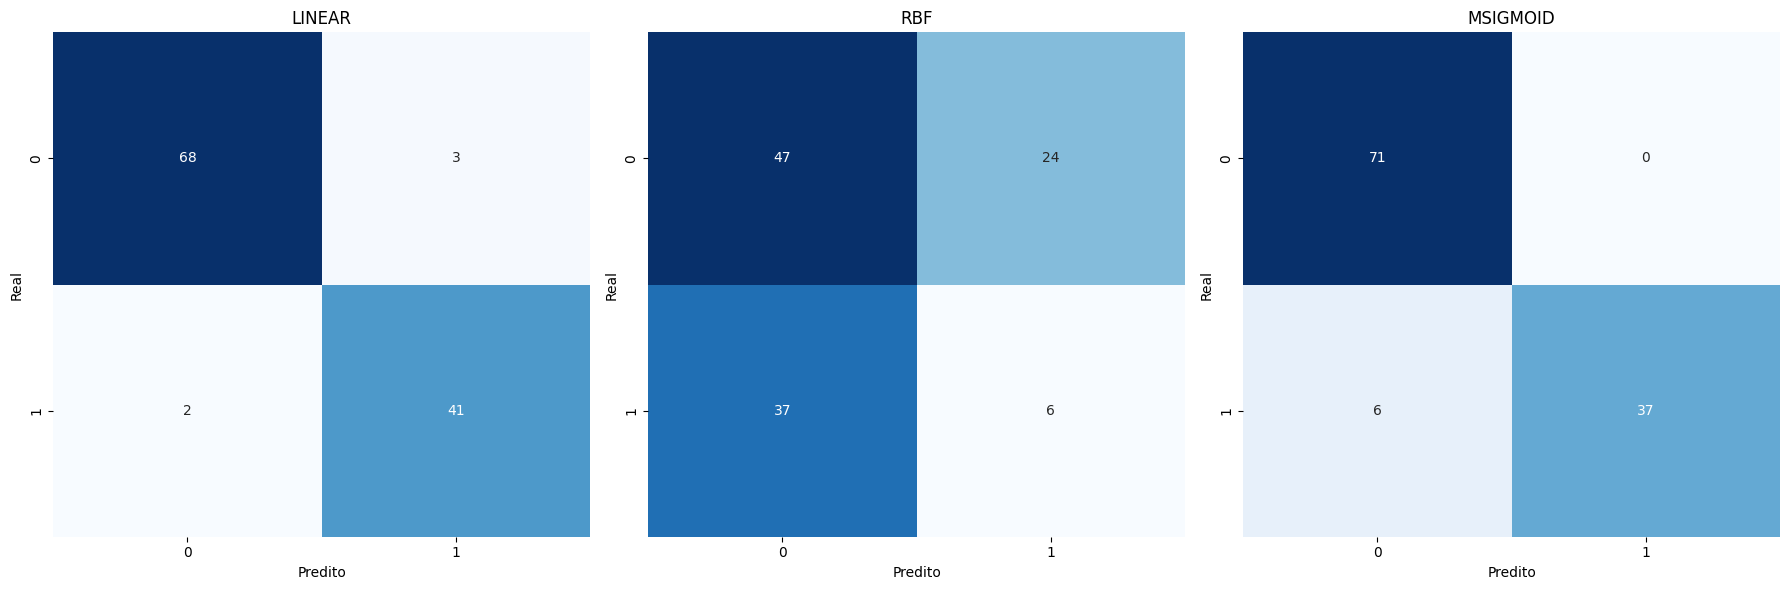

In [89]:
conf_matrix1 = confusion_matrix(y_teste, previsoes)
conf_matrix2 = confusion_matrix(y2_teste, previsoes2)
conf_matrix3 = confusion_matrix(y2_teste, previsoes3)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('LINEAR')
axes[0].set_xlabel('Predito')
axes[0].set_ylabel('Real')

sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('RBF')
axes[1].set_xlabel('Predito')
axes[1].set_ylabel('Real')

sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[2])
axes[2].set_title('MSIGMOID')
axes[2].set_xlabel('Predito')
axes[2].set_ylabel('Real')

plt.tight_layout()

plt.show()

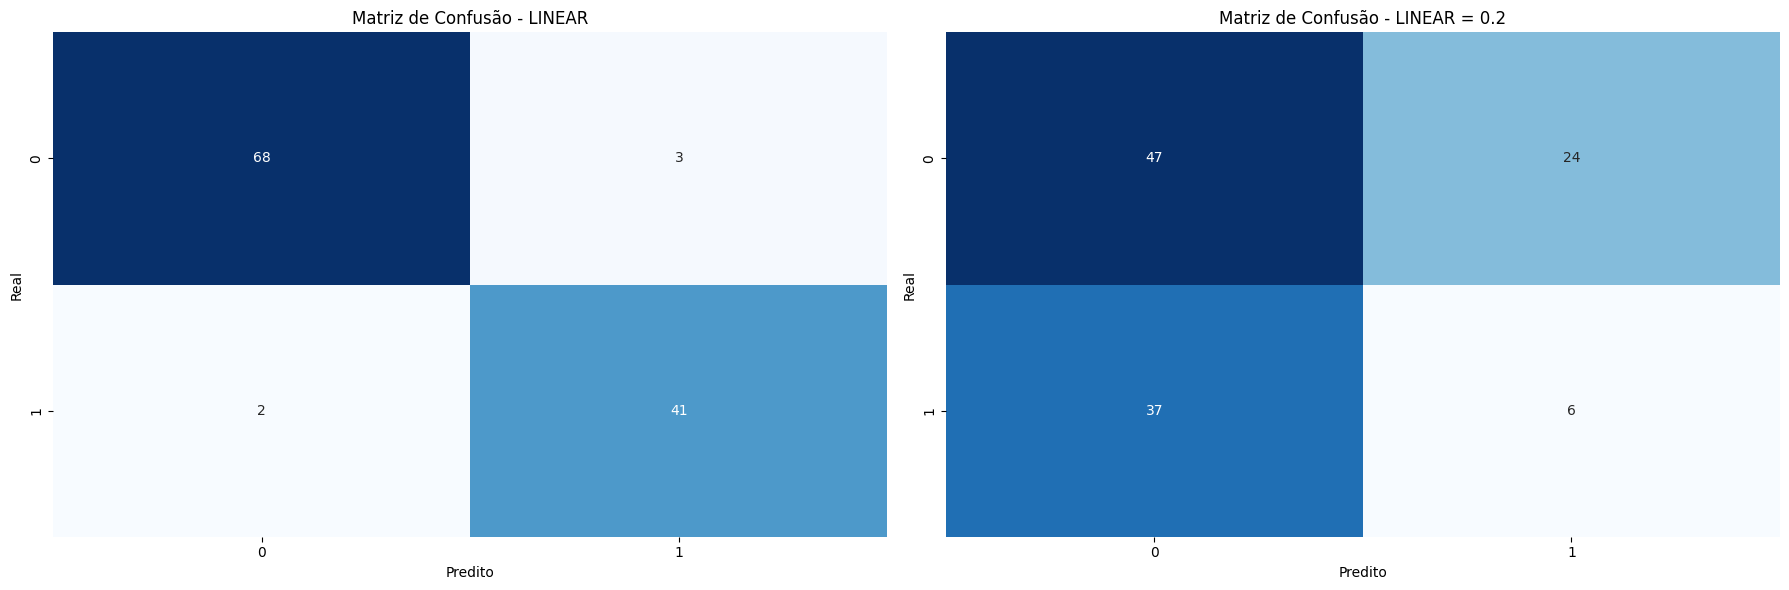

In [90]:
conf_matrix1 = confusion_matrix(y_teste, previsoes)
conf_matrixc = confusion_matrix(y_teste, previsoesc)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Matriz de Confusão - LINEAR')
axes[0].set_xlabel('Predito')
axes[0].set_ylabel('Real')

sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Matriz de Confusão - LINEAR = 0.2')
axes[1].set_xlabel('Predito')
axes[1].set_ylabel('Real')

plt.tight_layout()

plt.show()